## **Aula 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Entendendo o problema**


* https://spark.apache.org/docs/latest/api/python/index.html 
* https://spark.apache.org/docs/latest/ml-guide.html

## **Dicionário dos dados**

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

<h1>Instalando o PySpark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=1c22ece8f93cf75e149bc8a9381e884adad0caa6fd0be58171f50bab852613fb
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


Importando a Classe SparkSession que é por onde vamos interagir com o Spark

In [ ]:
from pyspark.sql import SparkSession

Criando a sessão Spark, aqui podemos verificar a versão que estamos utilizando e o nome da nossa App Spark

In [ ]:
sessao_spark = SparkSession\
                  .builder\
                  .appName("Recomendador PySpark")\
                  .getOrCreate()

sessao_spark

## **Leitura dos Dados**

In [ ]:
# Bibliotecas
from pyspark import SparkFiles
import pyspark.sql.functions as f

In [ ]:
# leitura do arquivo direto do Github
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

In [ ]:
# importar dados
dados = (sessao_spark
         .read
         .csv(path_dados_file,
              header=True,
              sep=';',
              inferSchema=True,
              )
)

In [ ]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [ ]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [ ]:
# numero de linhas
dados.count()

20311

In [ ]:
# numero de colunas
len(dados.columns)

19

In [ ]:
# espaços vazios (null)
(dados
 .select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns])
 .show()
)

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [ ]:
print(sorted(dados.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## **Aula 2**

## **Análise dos dados**

In [ ]:
# url dos dados em anos
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'
sessao_spark.sparkContext.addFile(url_anos_dados)

# path para os dados a serem lidos
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

# leitura dados
dados_anos = (sessao_spark
              .read
              .csv(path_dados_file,
                   header=True,
                   inferSchema=True,
                   )
)

In [ ]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [ ]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.limit(5).show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-----------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|          loudness|        speechiness|             tempo|           valence|       popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-----------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853|-8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991| 46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.6269855221945144|

In [ ]:
dados_anos.count()

21

In [ ]:
len(dados_anos.columns)

14

In [ ]:
# colocar no ToPandas
import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness por ano')
fig.show()

In [ ]:
# comparar todos os atributos por ano
import plotly.graph_objects as go

# cria figura
fig = go.Figure()

#tabela temporaria
temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()


## **Matriz de correlação**: Tabela anos

In [ ]:
# matriz correlaçao
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

## **Leitura dados:** gênero musical

In [ ]:
# url com endereço dos dados
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

# add dados no contexto spark
sessao_spark.sparkContext.addFile(url_dados_generos)

path_dados_file = 'file://' + SparkFiles.get('dados_musicas_genero.csv')

# lê os dados
dados_generos = (sessao_spark
                 .read
                 .csv(path_dados_file,
                      header=True,
                      inferSchema=True,
                      )
)


In [ ]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [ ]:
# numero linhas
dados_generos.count()

2973

In [ ]:
# numero de generos
len(dados_generos.select('genres').distinct().collect())

2973

In [ ]:
# numero de colunas
len(dados_generos.columns)

14

## **Vector Assembler**

In [ ]:
# importa biblioteca
from pyspark.ml.feature import VectorAssembler


In [ ]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
# features
X = dados_generos.columns
X.remove('genres')

In [ ]:
# monta o vector assembler
vector_assembler = VectorAssembler(inputCols=X, outputCol='features')

# ransforma base de dados de generos
dados_generos_vector = vector_assembler.transform(dados_generos)

# seleciona features
dados_generos_vector = (dados_generos_vector
                        .select(['features', 'genres'])
)

In [ ]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

## **Standard Scaler**

In [ ]:
# import standard scaler
from pyspark.ml.feature import StandardScaler


In [ ]:
# monta scaler
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)


In [ ]:
dados_generos_scaler.show(n=5)

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



## **PCA**: reduçãod e dimensionalidade

In [ ]:
# importa modelo
from pyspark.ml.feature import PCA


In [ ]:
# monta modelo
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [ ]:
dados_generos_pca.select('pca_features').show(n=5, truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.43816913737697955]  |
|[-0.5969679056633486,4.981612052751347]  |
|[-4.158460276223561,-0.8366525081079937] |
|[-2.387344878512217,-0.4877989015663406] |
|[-2.6501218371679083,-0.5756819768820469]|
+-----------------------------------------+
only showing top 5 rows



## **Aula 3**

## **Pipeline dados gêneros musicais**

In [ ]:
# import pipeline
from pyspark.ml import Pipeline


In [ ]:
# stages do pipeline
vector_assembler = VectorAssembler(inputCols=X, outputCol='features')
std_scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')

pca_pipeline = Pipeline(stages=[vector_assembler,
                                std_scaler,
                                pca,
                                ]
                        )


In [ ]:
# fit do pipeline
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [ ]:
# transform dados_generos
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [ ]:
dados_generos_pca.show(n=5, truncate=False)

+----+----------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+---+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------+
|mode|genres                |acousticness      |danceability       |duration_ms       |energy             |instrumentalness    |liveness           |loudness           |speechiness        |tempo             |valence            |popularity   

In [ ]:
dados_generos_pca.select('pca_features').show(n=5, truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.43816913737697955]  |
|[-0.5969679056633486,4.981612052751347]  |
|[-4.158460276223561,-0.8366525081079937] |
|[-2.387344878512217,-0.4877989015663406] |
|[-2.6501218371679083,-0.5756819768820469]|
+-----------------------------------------+
only showing top 5 rows



## **K-Means**: Clusterização por gênero musical

In [ ]:
# importa biblioteca
from pyspark.ml.clustering import KMeans


In [ ]:
# seed
SEED = 1224

# K-means objeto
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [ ]:
# K-Means modelo treino
model_kmeans = kmeans.fit(dados_generos_pca)

# K-Means modelo transforme
predictions_kmeans = model_kmeans.transform(dados_generos_pca)


In [ ]:
# previsões
predictions_kmeans.select('pca_features', 'cluster_pca').limit(10).show(truncate=False)

+-----------------------------------------+-----------+
|pca_features                             |cluster_pca|
+-----------------------------------------+-----------+
|[2.507095366888567,0.43816913737697955]  |2          |
|[-0.5969679056633486,4.981612052751347]  |2          |
|[-4.158460276223561,-0.8366525081079937] |4          |
|[-2.387344878512217,-0.4877989015663406] |0          |
|[-2.6501218371679083,-0.5756819768820469]|0          |
|[-1.4965091203367624,1.8644183183717793] |2          |
|[-3.9235207721573238,0.2851835002352834] |4          |
|[-4.611011109831115,-0.6783790472312372] |1          |
|[-2.8376900630842297,-0.5712993716580518]|4          |
|[-2.706690139892783,-1.2593788079708297] |0          |
+-----------------------------------------+-----------+



## **Plotando o clustering**

In [ ]:
# importa biblioteca
from pyspark.ml.functions import vector_to_array


In [ ]:
# separa os features em colunas novas
pca_features_XY = (predictions_kmeans
                   .withColumn('X', vector_to_array('pca_features')[0])
                   .withColumn('Y', vector_to_array('pca_features')[1])
                   .select(['X', 'Y', 'cluster_pca', 'genres'])
)

In [ ]:
pca_features_XY.show(n=10)

+-------------------+-------------------+-----------+--------------------+
|                  X|                  Y|cluster_pca|              genres|
+-------------------+-------------------+-----------+--------------------+
|  2.507095366888567|0.43816913737697955|          2|21st century clas...|
|-0.5969679056633486|  4.981612052751347|          2|               432hz|
| -4.158460276223561|-0.8366525081079937|          4|               8-bit|
| -2.387344878512217|-0.4877989015663406|          0|                  []|
|-2.6501218371679083|-0.5756819768820469|          0|          a cappella|
|-1.4965091203367624| 1.8644183183717793|          2|            abstract|
|-3.9235207721573238| 0.2851835002352834|          4|      abstract beats|
| -4.611011109831115|-0.6783790472312372|          1|    abstract hip hop|
|-2.8376900630842297|-0.5712993716580518|          4|           accordeon|
| -2.706690139892783|-1.2593788079708297|          0|           accordion|
+-------------------+----

In [ ]:
# Plot
fig = px.scatter(pca_features_XY.toPandas(),
                 x='X',
                 y='Y',
                 color='cluster_pca',
                 hover_data=['X', 'Y', 'genres'])

fig.show()

In [ ]:
# detalhamento pca
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

## **Aula 4**

## **K-Means**: Clusterização por música

In [ ]:
# dados das musicas
dados.show(n=5)

+------------------+----+------------+------------+------------+-----------+------------------+--------+--------------------+----------------+---+--------+-------------------+----+-------------------+----------+-----------+-------+--------------------+
|           valence|year|acousticness|     artists|danceability|duration_ms|            energy|explicit|                  id|instrumentalness|key|liveness|           loudness|mode|               name|popularity|speechiness|  tempo|        artists_song|
+------------------+----+------------+------------+------------+-----------+------------------+--------+--------------------+----------------+---+--------+-------------------+----+-------------------+----------+-----------+-------+--------------------+
|             0.285|2000|     0.00239|    Coldplay|       0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|         1.21E-4| 11|   0.234|             -7.227|   1|             Yellow|        84|     0.0281|173.372|   Coldpla

**Remove colunas indesejadas**

In [ ]:
# colunas para ML
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')

X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

**Coloca dados em vetores**

In [ ]:
# montagem dfas features
vector_assemble = VectorAssembler(inputCols=X, outputCol='features')

# dados transformados
dados_encoded_vector = vector_assemble.transform(dados)

In [ ]:
# exibe dados transformados
(dados_encoded_vector
 .select('features')
 .show(n=5, truncate=False)
)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

**Escalonamento das features**

In [ ]:
# escalonamento dos dados
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)

# transforma dados
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [ ]:
# exibe dados transformados
(dados_musicas_scaler
 .select('features_scaled')
 .show(n=5, truncate=False)
)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

**PCA nos dados**

In [ ]:
# numero e componentes
K = len(X)

# objeto PCA
pca = PCA(k=K, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)

# aplica a transformação
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [ ]:
# soma das variâncias
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(K)]
lista_valores

[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [ ]:
import numpy as np

# numero de componentes finais
K = sum(np.array(lista_valores) <= 0.7)
K

6

In [ ]:
# RETREINAR O PCA COM O NOVO K
# objeto PCA
pca = PCA(k=K, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)

# aplica a transformação
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [ ]:
# exibe dados transformados
(dados_musicas_pca_final
 .select('pca_features')
 .show(n=5, truncate=False)
)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [ ]:
# variância somada das 6 componentes
sum(model_pca.explainedVariance)

0.6665719513652388

## **Pipeline dados músicas**

In [ ]:
# objetos do pipeline
vector_assembler = VectorAssembler(inputCols=X, outputCol='features')
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
pca = PCA(k=6, inputCol='features_scaled', outputCol='pca_features')

# monta pipeline
pca_pipeline = Pipeline(stages=[vector_assembler,
                                scaler,
                                pca,
                                ]
                        )

# ajusta modelo pipeline
model_pca_pipeline = pca_pipeline.fit(dados)

In [ ]:
# transforma os dados
projection = model_pca_pipeline.transform(dados)

In [ ]:
projection.select('pca_features').show(n=5, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810391] |
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.90435265671297,-13.388401890587229,3.972980727830862]|
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]   |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]   |
|[-36.54556974907567,-167.37512505802482,-11.881276527236556,-136.2779859024398,-14.056847990344538,3.5833901457791564] |
+-----------------------

In [ ]:
# monta modelo
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

# ajusta modelo K-Means
modelo_kmeans = kmeans.fit(projection)

# transforma os dados
projection_kmeans = modelo_kmeans.transform(projection)

In [ ]:
projection_kmeans.select(['pca_features', 'cluster_pca']).show(n=10)

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
+--------------------+-----------+
only showing top 10 rows



In [ ]:
# pega dois features e coloa em colunas X e Y
projection_kmeans = (projection_kmeans
                     .withColumn('X', vector_to_array('pca_features')[0])
                     .withColumn('Y', vector_to_array('pca_features')[1])
)

In [ ]:
projection_kmeans.select(['X', 'Y', 'cluster_pca', 'artists_song']).show(n=10)

+-------------------+-------------------+-----------+--------------------+
|                  X|                  Y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775704|-165.36848784906184|          8|   Coldplay - Yellow|
|-36.498857627749054|-167.85185045616558|          4|OutKast - Ms. Jac...|
|-35.460300916940554|-165.99633344577887|         35|Linkin Park - In ...|
| -35.56301325520583|-165.59515096480607|         16|3 Doors Down - Kr...|
| -36.54556974907567|-167.37512505802482|         34|Eminem - The Real...|
| -36.71322229026232|-166.48208483099708|         34|Disturbed - Down ...|
|-36.013246178822214|-166.63514920955345|         34| Nelly - Ride Wit Me|
|  -36.5426877121049|-166.97928234833242|         23|       Eminem - Stan|
| -36.42524900978431|-165.10535006330758|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577073|-166.03098838247917|         34|Britney Spears - ...|
+-------------------+----

## **Plotando cluster músicas**

In [ ]:
# Plot
fig = px.scatter(projection_kmeans.toPandas(), x='X', y='Y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

## **Aula 5**

In [ ]:
# musica referência
nome_musica = 'Taylor Swift - Blank Space'

In [ ]:
# cluster da musica de referenncia
cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [ ]:
# musicas do mesmo cluster
musicas_recomendadas = (projection_kmeans
                        .filter(projection_kmeans.cluster_pca == cluster)
                        .select('artists_song', 'id', 'pca_features')
)

musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [ ]:
# vetor com as componentes da musica de referencia
componentes_musica = (musicas_recomendadas
                      .filter(musicas_recomendadas.artists_song == nome_musica)
                      .select('pca_features')
                      .collect()[0][0]
)

componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, -13.1234, 4.1374])

In [ ]:
# importa
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [ ]:
# função calcula distancia
udf_calc_distance = f.udf(lambda value: euclidean(componentes_musica, value), FloatType())

musicas_recomendadas_dist = (musicas_recomendadas
                             .withColumn('Distance', udf_calc_distance('pca_features'))
)

musicas_recomendadas_dist.sort('Distance').show(n=5)

+--------------------+--------------------+--------------------+----------+
|        artists_song|                  id|        pca_features|  Distance|
+--------------------+--------------------+--------------------+----------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|[-35.460966235978...|       0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|[-35.357036076091...|0.37921473|
|The All-American ...|6ihL9TjfRjadfEePz...|[-35.230574533645...| 0.6039154|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...|[-35.086961071907...|0.68249357|
|Old Dominion - Sn...|7I5fYc4qKJddht8Oz...|[-35.487363172957...|0.73640364|
+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [ ]:
# Pega 10 menores distancias em relação a musica referencia
recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist
                                            .sort('Distance')
                                            .take(10)
                                            ).select(['artists_song','id','Distance'])
recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|           Distance|
+--------------------+--------------------+-------------------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|                0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Old Dominion - Sn...|7I5fYc4qKJddht8Oz...| 0.7364036440849304|
|Dan + Shay - Noth...|4W38RXuQNuoTSwVsQ...| 0.7841535210609436|
|Twenty One Pilots...|7qxjGHW485TL8ciwk...| 0.8002141118049622|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.8098159432411194|
|Kip Moore - More ...|73WWkaWkIRSP3MYGZ...| 0.8557121753692627|
|Calibre 50 - Corr...|0ehx1p1HMn7NMKisZ...| 0.8788507580757141|
+--------------------+--------------------+-------------------+



In [ ]:
# consolidar passos dentro da funcao
def recomendador(nome_musica):

  # cluster da musica de referenncia
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]

  # musicas do mesmo cluster
  musicas_recomendadas = (projection_kmeans
                          .filter(projection_kmeans.cluster_pca == cluster)
                          .select('artists_song', 'id', 'pca_features')
  )

  # vetor com as componentes da musica de referencia
  componentes_musica = (musicas_recomendadas
                        .filter(musicas_recomendadas.artists_song == nome_musica)
                        .select('pca_features')
                        .collect()[0][0]
  )

  # função calcula distancia
  udf_calc_distance = f.udf(lambda value: euclidean(componentes_musica, value), FloatType())

  musicas_recomendadas_dist = (musicas_recomendadas
                               .withColumn('Distance', udf_calc_distance('pca_features'))
  )

  # Pega 10 menores distancias em relação a musica referencia
  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist
                                              .sort('Distance')
                                              .take(10)
                                              ).select(['artists_song','id','Distance'])
  
  recomendadas.select('artists_song').show(truncate=False)

In [ ]:
# chama funcao recomendador
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



**Integração Spotify**

In [ ]:
!pip install spotipy

In [ ]:
# import biblioteca
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

**Atenção**

Antes de rodar esta página do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [ ]:
# obtido na documentação
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(scope=scope,
                     redirect_uri='http://localhost:5000/callback',
                     client_id = 'e18094b4758a49c4bf927d7785d2a7b4',
                     client_secret = '79d9ca9141e247488777dcb77b017ad4',
                     )


In [ ]:
# credenciais
client_credentials_manager = SpotifyClientCredentials(client_id = 'e18094b4758a49c4bf927d7785d2a7b4',
                                                      client_secret = '79d9ca9141e247488777dcb77b017ad4')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [ ]:
# id da musica de referenncia
id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

'1p80LdxRV74UKvL8gnD7ky'

In [ ]:
sp.track(id)

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date'

**Imagem do Álbum**

In [ ]:
def calc_musicas_recomendadas(nome_musica):

  # cluster da musica de referencia
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]

  # musicas do mesmo cluster
  musicas_recomendadas = (projection_kmeans
                          .filter(projection_kmeans.cluster_pca == cluster)
                          .select('artists_song', 'id', 'pca_features')
  )

  # vetor com as componentes da musica de referencia
  componentes_musica = (musicas_recomendadas
                        .filter(musicas_recomendadas.artists_song == nome_musica)
                        .select('pca_features')
                        .collect()[0][0]
  )

  return musicas_recomendadas, componentes_musica

In [ ]:
def calc_distancia(componentes_musica, musicas_recomendadas):

  # função calcula distancia
  udf_calc_distance = f.udf(lambda value: euclidean(componentes_musica, value), FloatType())

  musicas_recomendadas_dist = (musicas_recomendadas
                               .withColumn('Distance', udf_calc_distance('pca_features'))
  )

  # Pega 10 menores distancias em relação a musica referencia
  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist
                                              .sort('Distance')
                                              .take(10)
                                              ).select(['artists_song','id','Distance'])
  
  return recomendadas

In [ ]:
def pega_id(recomendadas):

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])
  
  return name, url

In [ ]:
def visualize_songs(name,url):

  import matplotlib.pyplot as plt
  from skimage import io

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=False)
      #plt.axis('off')
        
  plt.show()

In [ ]:
# recomendador consolidado final
def recomendador_final(nome_musica):

  musicas_recomendadas, componentes_musica = calc_musicas_recomendadas(nome_musica)

  recomendadas = calc_distancia(componentes_musica, musicas_recomendadas)

  name, url = pega_id(recomendadas)

  visualize_songs(name,url)

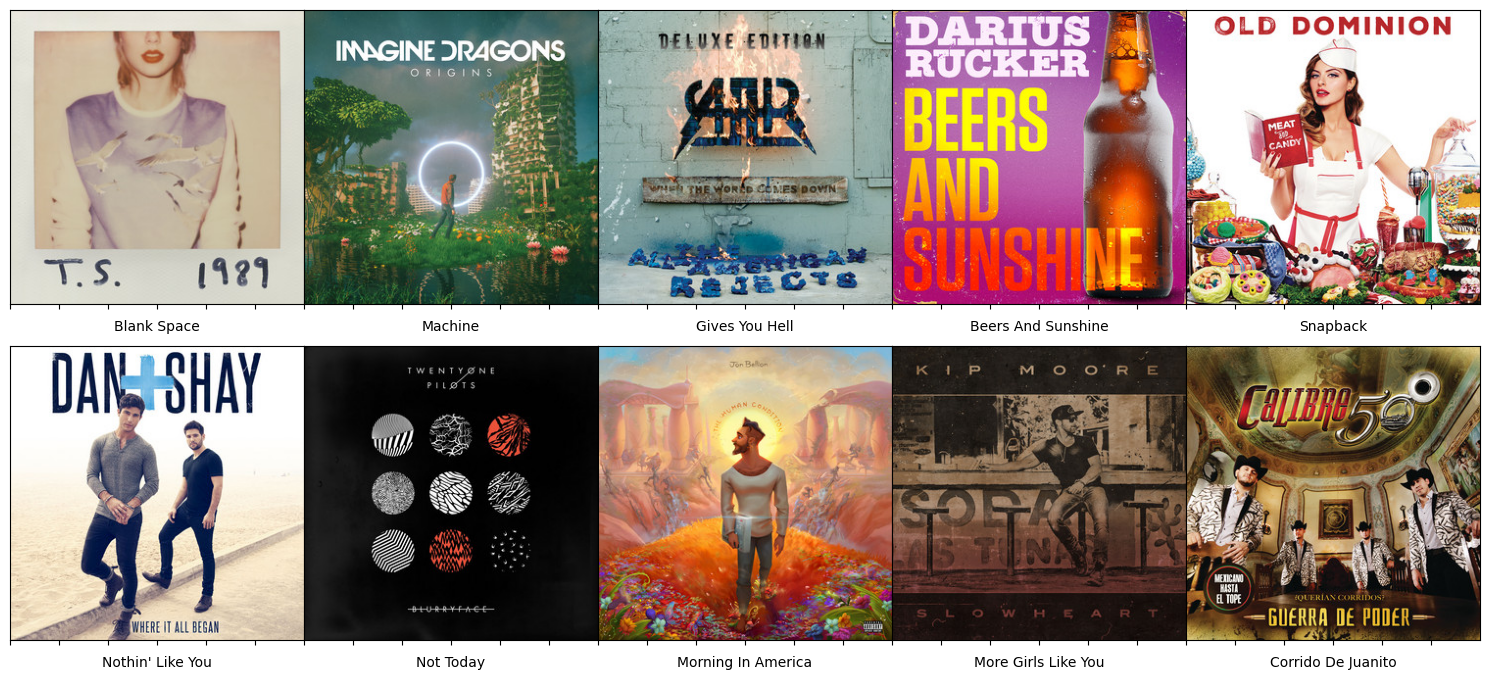

In [ ]:
# chama funcao recomendador
recomendador_final('Taylor Swift - Blank Space')